## Importing all the libraries 

In [1]:
import yfinance as yf
import time
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import seaborn as sns

## Setting the cryptos that we want and the date 

In [2]:
#setting tick
tick = [
     'SOL-USD', 'MATIC-USD',
    'ARB-USD', 'OP-USD', 'EGLD-USD', 'KAS-USD', 'NEAR-USD',
    'UNI-USD', 'AAVE-USD', 'SNX-USD',
    'SAND-USD', 'AXS-USD', 'MANA-USD', 'ILV-USD',
    'XMR-USD', 'ZEC-USD', 'DASH-USD', 'KMD-USD', 'SCRT-USD',
    'OKB-USD', 'HT-USD', 'FTT-USD', 'CRO-USD',
    'USDC-USD', 'DAI-USD',"TRX-USD",'INJ-USD','FET-USD','LTC-USD','FIL-USD'
]

print (len (tick))

30


In [3]:
# setting date
start_date = datetime(2023, 10, 1).strftime('%Y-%m-%d')
end_date = datetime(2024, 10, 1).strftime('%Y-%m-%d')

## Downloading the related data from yahoo finance and saving it to df 
#### I am only using 'Close' price 

In [14]:
df = yf.download(tick, start= start_date , end = end_date )

[*********************100%***********************]  30 of 30 completed


In [37]:
tic = 'AXS-USD'
enddate = datetime(2025, 1, 31).strftime('%Y-%m-%d')
df2 = yf.download(tic, start= start_date , end = enddate )
df2

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AXS-USD,AXS-USD,AXS-USD,AXS-USD,AXS-USD
Date,,,,,
2023-10-01,4.784446,4.798980,4.580248,4.586246,24317165
2023-10-02,4.580239,4.789109,4.520734,4.784734,35502891
2023-10-03,4.510132,4.626953,4.495383,4.580125,34281462
2023-10-04,4.489252,4.510108,4.399855,4.510108,19675686
2023-10-05,4.413610,4.503926,4.402169,4.489078,13564981
...,...,...,...,...,...
2025-01-26,5.555037,5.828735,5.554816,5.714628,29792389
2025-01-27,5.453837,5.557633,5.068537,5.555035,52622765


In [12]:
df.shape

(366, 150)

## Check if there are any missing values 

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2023-10-01 to 2024-09-30
Columns: 150 entries, ('Close', 'AAVE-USD') to ('Volume', 'ZEC-USD')
dtypes: float64(120), int64(30)
memory usage: 431.8 KB


In [8]:
isinstance(df.index, pd.DatetimeIndex)

True

In [43]:
df

Price            Close                                                     \
Ticker        AAVE-USD   ARB-USD   AXS-USD   CRO-USD   DAI-USD   DASH-USD   
Date                                                                        
2023-10-01   72.131088  0.971742  4.784446  0.051809  1.000179  28.240480   
2023-10-02   69.210991  0.946937  4.580239  0.050670  0.999701  27.403616   
2023-10-03   65.151764  0.930169  4.510132  0.050256  0.999508  27.079670   
2023-10-04   66.610451  0.905753  4.489252  0.050305  1.000200  27.062475   
2023-10-05   66.832779  0.868543  4.413610  0.050106  0.999327  26.910660   
...                ...       ...       ...       ...       ...        ...   
2024-09-26  165.323883  0.000652  5.329161  0.087204  1.000095  25.975662   
2024-09-27  170.749878  0.000658  5.417719  0.087892  0.999957  26.013897   
2024-09-28  164.022827  0.000659  5.402294  0.086331  0.999832  25.733234   
2024-09-29  161.445908  0.000656  5.501791  0.086195  0.999879  25.511148   
2024-09-30  156.475174  0.000633  5.043188  0.083447  0.999781  24.405899   

Price                                                ...     Volume            \
Ticker       EGLD-USD   FET-USD   FIL-USD   FTT-USD  ...     OP-USD  SAND-USD   
Date                                                 ...                        
2023-10-01  25.914946  0.234838  3.460823  1.182690  ...   84750486  39476136   
2023-10-02  24.895975  0.222515  3.335469  1.154983  ...  137404216  51477596   
2023-10-03  24.444914  0.218336  3.306499  1.190931  ...  110190450  44216538   
2023-10-04  24.719156  0.219920  3.312910  1.206916  ...   99757057  69171745   
2023-10-05  24.049154  0.215714  3.258778  1.218892  ...   82532896  42478372   
...               ...       ...       ...       ...  ...        ...       ...   
2024-09-26  29.721548  1.631069  4.100573  1.435189  ...  146361966  51322036   
2024-09-27  30.219299  1.683695  4.198005  1.464763  ...  198063239  52209248   
2024-09-28  29.294403  1.599913  4.129866  1.401692  ...  101895330  39719128   
2024-09-29  29.409607  1.619767  4.085205  2.203507  ...  119448367  37807387   
2024-09-30  27.473413  1.526944  3.812599  1.844733  ...  169085672  49910848   

Price                                                                     \
Ticker     SCRT-USD   SNX-USD     SOL-USD    TRX-USD UNI-USD    USDC-USD   
Date                                                                       
2023-10-01  1311047  25797264   637123111  150130603      12  2061687654   
2023-10-02  2521842  29543800   658084028  197202684      12  4197739502   
2023-10-03  2407973  30356436   653491878  219892593      12  2520912223   
2023-10-04  4324080  22662389   429268875  209971945      12  2560902818   
2023-10-05  1349952  26517049   361288781  164533914      12  2671315261   
...             ...       ...         ...        ...     ...         ...   
2024-09-26  1575816  22095507  3009969111  307154160      27  6835010999   
2024-09-27  1706803  21384639  2765830721  352985159      28  5842305183   
2024-09-28  1506832  15599296  1300870644  237118461      28  2872721698   
2024-09-29  1257823  13741052  1773980028  265085146      28  3054087540   
2024-09-30  1366616  17720604  2376780676  356554430      27  6665769413   

Price                           
Ticker       XMR-USD   ZEC-USD  
Date                            
2023-10-01  68116546  33661926  
2023-10-02  62225244  39477929  
2023-10-03  49389643  39276194  
2023-10-04  59400400  40237126  
2023-10-05  55704972  39176880  
...              ...       ...  
2024-09-26  48986546  73025475  
2024-09-27  43108909  67969445  
2024-09-28  38166295  61648546  
2024-09-29  64757773  57943238  
2024-09-30  67636316  64364076  

[366 rows x 150 columns]

## Apply K-mean and group the Crypto into 4 groups 

#### First I need to transpose the data frame to have cryptos as rows for grouping 

In [15]:
df1 = df['Close'].T
df1

Date,2023-10-01,2023-10-02,2023-10-03,2023-10-04,2023-10-05,2023-10-06,2023-10-07,2023-10-08,2023-10-09,2023-10-10,...,2024-09-21,2024-09-22,2024-09-23,2024-09-24,2024-09-25,2024-09-26,2024-09-27,2024-09-28,2024-09-29,2024-09-30
Ticker,,,,,,,,,,,,,,,,,,,,,
AAVE-USD,72.131088,69.210991,65.151764,66.610451,66.832779,68.967110,66.741516,66.025879,63.285080,64.039032,...,154.264450,162.262070,172.069824,166.424805,165.369522,165.323883,170.749878,164.022827,161.445908,156.475174
ARB-USD,0.971742,0.946937,0.930169,0.905753,0.868543,0.890812,0.880140,0.871853,0.837076,0.827232,...,0.000634,0.000636,0.000633,0.000643,0.000631,0.000652,0.000658,0.000659,0.000656,0.000633
AXS-USD,4.784446,4.580239,4.510132,4.489252,4.413610,4.510892,4.507913,4.458587,4.286147,4.257745,...,5.118271,4.899778,5.046835,5.164043,5.161442,5.329161,5.417719,5.402294,5.501791,5.043188
CRO-USD,0.051809,0.050670,0.050256,0.050305,0.050106,0.050737,0.050625,0.050320,0.049731,0.049306,...,0.088162,0.085801,0.085816,0.086639,0.084639,0.087204,0.087892,0.086331,0.086195,0.083447
DAI-USD,1.000179,0.999701,0.999508,1.000200,0.999327,0.999894,0.999789,0.999976,0.999708,0.999716,...,1.000111,1.000084,0.999962,1.000021,1.000022,1.000095,0.999957,0.999832,0.999879,0.999781
DASH-USD,28.240480,27.403616,27.079670,27.062475,26.910660,26.959200,26.878466,26.577801,25.933477,25.685736,...,25.488333,24.915728,25.067818,25.870182,25.555210,25.975662,26.013897,25.733234,25.511148,24.405899
EGLD-USD,25.914946,24.895975,24.444914,24.719156,24.049154,24.285440,24.195465,24.520334,22.877609,22.982351,...,28.932289,28.134193,28.857565,29.037483,28.936035,29.721548,30.219299,29.294403,29.409607,27.473413
FET-USD,0.234838,0.222515,0.218336,0.219920,0.215714,0.225138,0.220684,0.218993,0.207300,0.203912,...,1.631713,1.615597,1.646979,1.708300,1.636199,1.631069,1.683695,1.599913,1.619767,1.526944
FIL-USD,3.460823,3.335469,3.306499,3.312910,3.258778,3.337882,3.448053,3.396153,3.229895,3.195368,...,3.869217,3.727432,3.761462,3.859548,3.942084,4.100573,4.198005,4.129866,4.085205,3.812599


#### Now I need to standardize the data so I can apply PCA and reduce the dimensionality of data 

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df_scaled

array([[ 1.74309527,  1.70666476,  1.58947108, ...,  2.89295893,
         2.8826263 ,  2.85536887],
       [-0.50727804, -0.5056147 , -0.50203054, ..., -0.53680171,
        -0.53959499, -0.53465282],
       [-0.38670348, -0.38786782, -0.38544206, ..., -0.42385164,
        -0.42298518, -0.42540584],
       ...,
       [-0.50638155, -0.50389407, -0.49975326, ..., -0.51590583,
        -0.51841363, -0.51300272],
       [ 4.1791347 ,  4.20181091,  4.25994774, ...,  2.77992066,
         2.70184767,  2.80980777],
       [ 0.34947744,  0.34856927,  0.34423767, ...,  0.07909331,
         0.07733946,  0.06713764]])

#### Now apply PCA

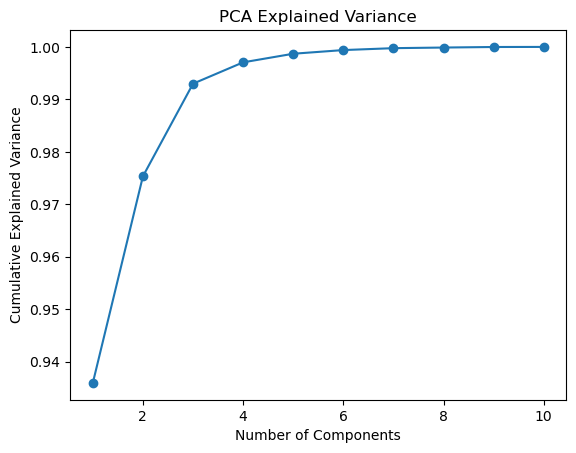

In [21]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

We can see from the plot that with 2 components we can get very good Cumulative Explained Variance and as we want to display the data using scatter plot in the next step we use only two components 

In [23]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, index=df1.index)
df_pca.head()

,0,1
Ticker,,
AAVE-USD,35.379356,0.441783
ARB-USD,-11.149962,0.180192
AXS-USD,-8.075520,-0.035737
CRO-USD,-11.196600,0.008649
DAI-USD,-10.776698,0.061720


#### Display the data 

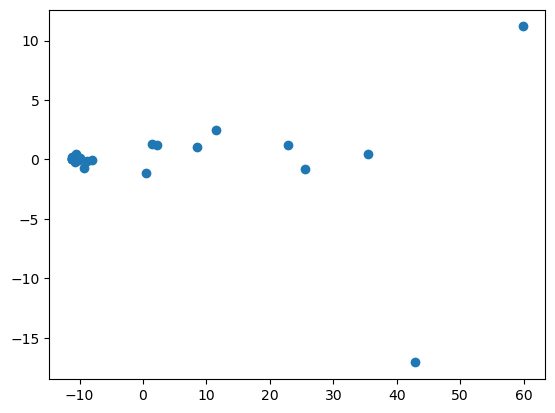

In [24]:
plt.scatter(df_pca[0],df_pca[1])
plt.show()

#### Using K-means to group this data with four groups 

First lets check how many groups does the elbow method suggests 

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

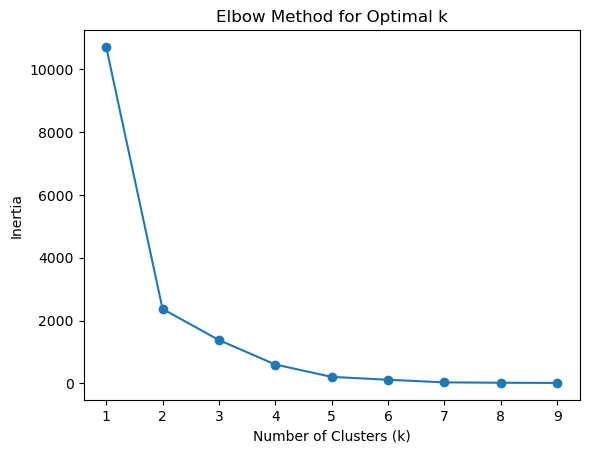

In [25]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

We can see that may be three groups is enough for this data set but as the assessment requires we will do with 4 groups 

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

#Lets see the groups and how many crypto is in each group 
df_clusters = pd.DataFrame({'Crypto': df1.index, 'Cluster': clusters})
print (df_clusters.Cluster.value_counts())
df_clusters

Cluster
1    20
2     5
0     4
3     1
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Crypto,Cluster
0,AAVE-USD,0
1,ARB-USD,1
2,AXS-USD,1
3,CRO-USD,1
4,DAI-USD,1
5,DASH-USD,2
6,EGLD-USD,2
7,FET-USD,1
8,FIL-USD,1
9,FTT-USD,1


Lets now visualize the data with groups 

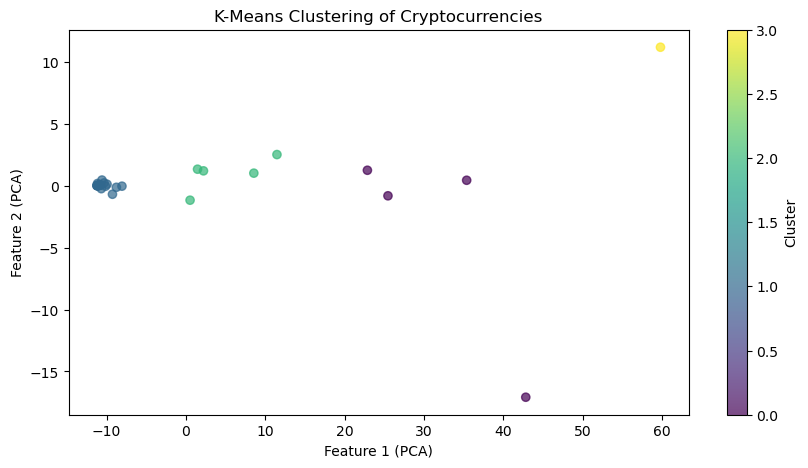

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1],c=clusters, alpha=0.7)
plt.title('K-Means Clustering of Cryptocurrencies')
plt.xlabel('Feature 1 (PCA)')
plt.ylabel('Feature 2 (PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [46]:
selected = ['ZEC-USD','XMR-USD','LTC-USD','AXS-USD']

In [47]:
selected_df = df1.T[selected]
selected_df

Ticker,ZEC-USD,XMR-USD,LTC-USD,AXS-USD
Date,,,,
2023-10-01,28.063318,149.161407,68.233315,4.784446
2023-10-02,27.304394,146.203430,66.011124,4.580239
2023-10-03,26.915659,147.151352,65.493515,4.510132
2023-10-04,27.146259,150.469055,64.452065,4.489252
2023-10-05,27.155380,149.623718,64.858765,4.413610
...,...,...,...,...
2024-09-26,30.190125,163.938614,68.518311,5.329161
2024-09-27,30.426661,164.159561,71.188202,5.417719
2024-09-28,29.454737,158.616974,70.003967,5.402294


array([[<Axes: title={'center': 'ZEC-USD'}>,
        <Axes: title={'center': 'XMR-USD'}>],
       [<Axes: title={'center': 'LTC-USD'}>,
        <Axes: title={'center': 'AXS-USD'}>]], dtype=object)

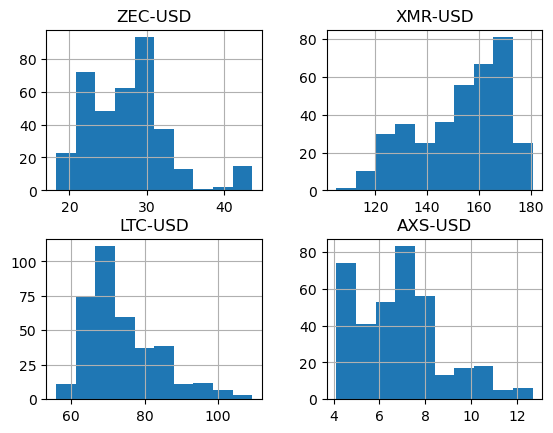

In [48]:
selected_df.hist()

<Axes: xlabel='Date'>

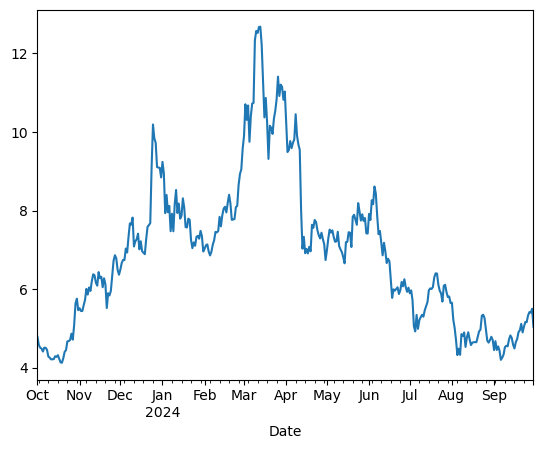

In [49]:
selected_df['AXS-USD'].plot.line()


<Axes: xlabel='Date'>

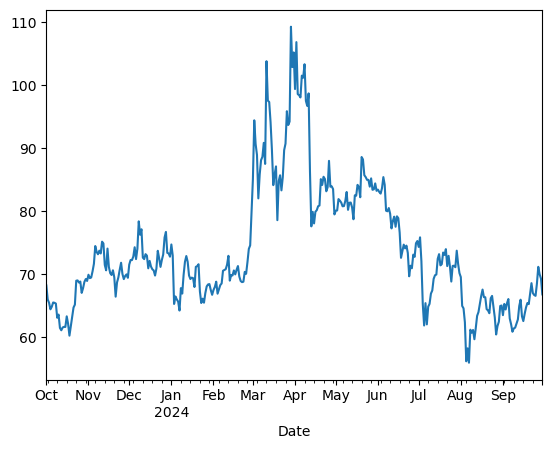

In [50]:
selected_df['LTC-USD'].plot.line()

<Axes: xlabel='Date'>

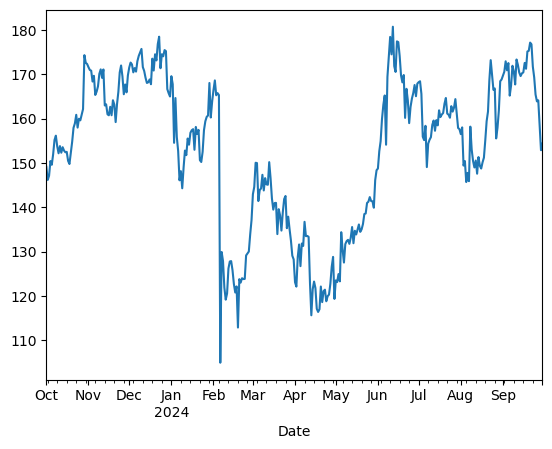

In [51]:
selected_df['XMR-USD'].plot.line()

<Axes: xlabel='Date'>

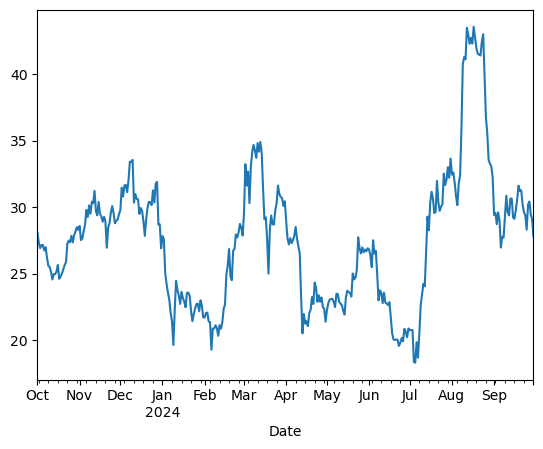

In [52]:
selected_df['ZEC-USD'].plot.line()

array([[<Axes: xlabel='ZEC-USD', ylabel='ZEC-USD'>,
        <Axes: xlabel='XMR-USD', ylabel='ZEC-USD'>,
        <Axes: xlabel='LTC-USD', ylabel='ZEC-USD'>,
        <Axes: xlabel='ARB-USD', ylabel='ZEC-USD'>],
       [<Axes: xlabel='ZEC-USD', ylabel='XMR-USD'>,
        <Axes: xlabel='XMR-USD', ylabel='XMR-USD'>,
        <Axes: xlabel='LTC-USD', ylabel='XMR-USD'>,
        <Axes: xlabel='ARB-USD', ylabel='XMR-USD'>],
       [<Axes: xlabel='ZEC-USD', ylabel='LTC-USD'>,
        <Axes: xlabel='XMR-USD', ylabel='LTC-USD'>,
        <Axes: xlabel='LTC-USD', ylabel='LTC-USD'>,
        <Axes: xlabel='ARB-USD', ylabel='LTC-USD'>],
       [<Axes: xlabel='ZEC-USD', ylabel='ARB-USD'>,
        <Axes: xlabel='XMR-USD', ylabel='ARB-USD'>,
        <Axes: xlabel='LTC-USD', ylabel='ARB-USD'>,
        <Axes: xlabel='ARB-USD', ylabel='ARB-USD'>]], dtype=object)

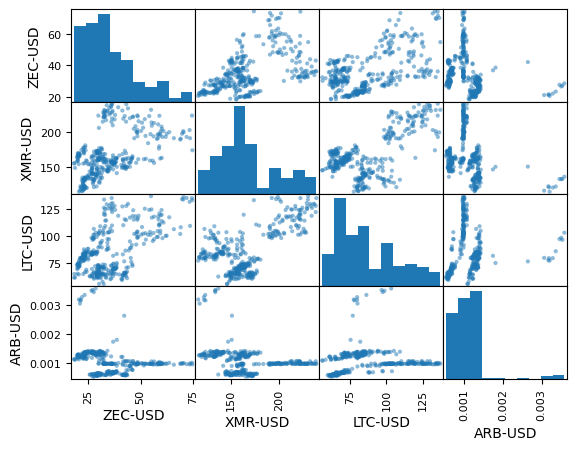

In [26]:
pd.plotting.scatter_matrix(selected_df)

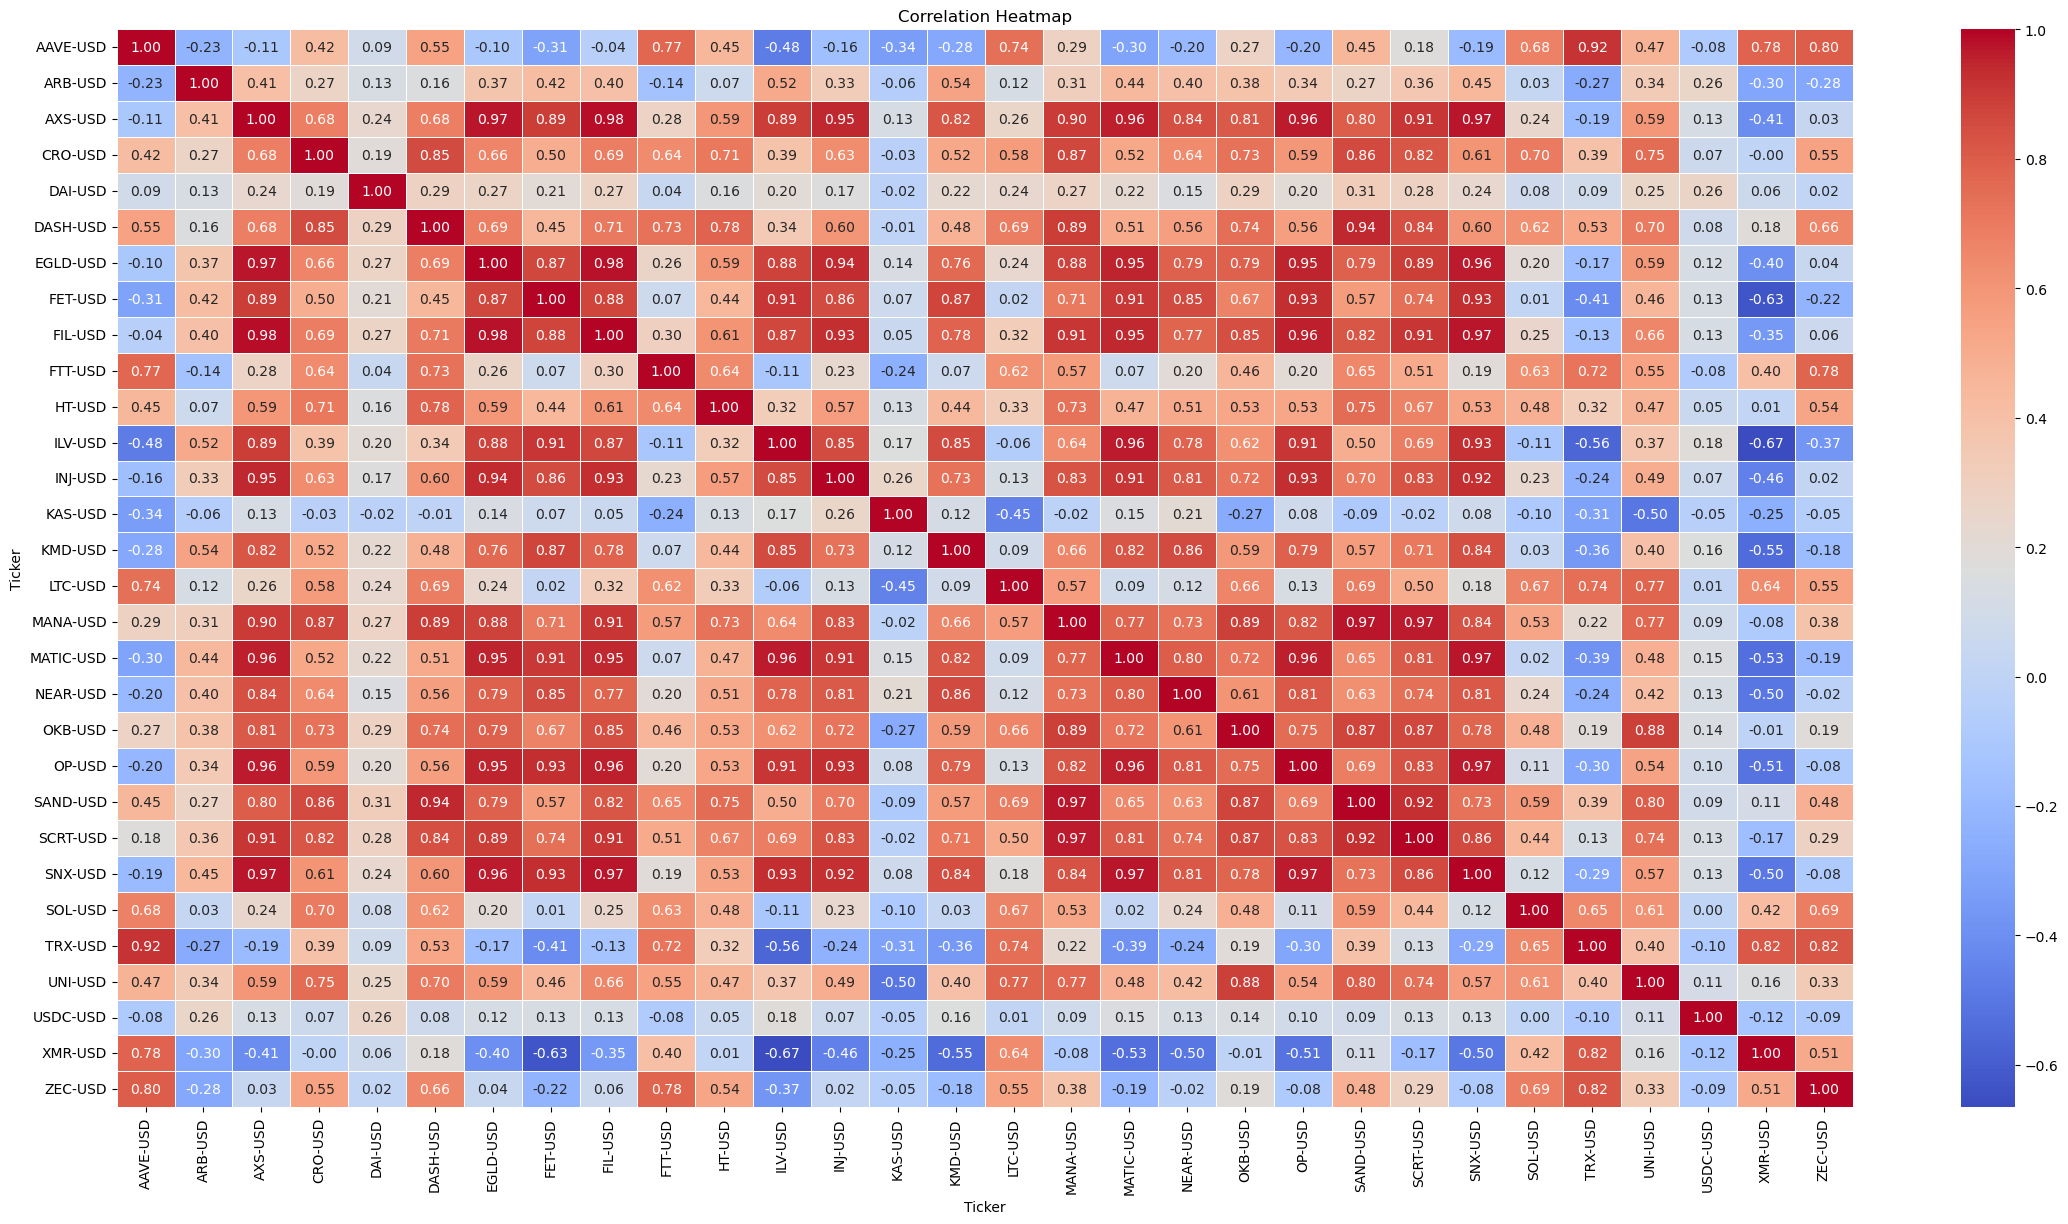

In [27]:
df1 = df.T
corr_matrix = df1.corr()
plt.figure(figsize=(28, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

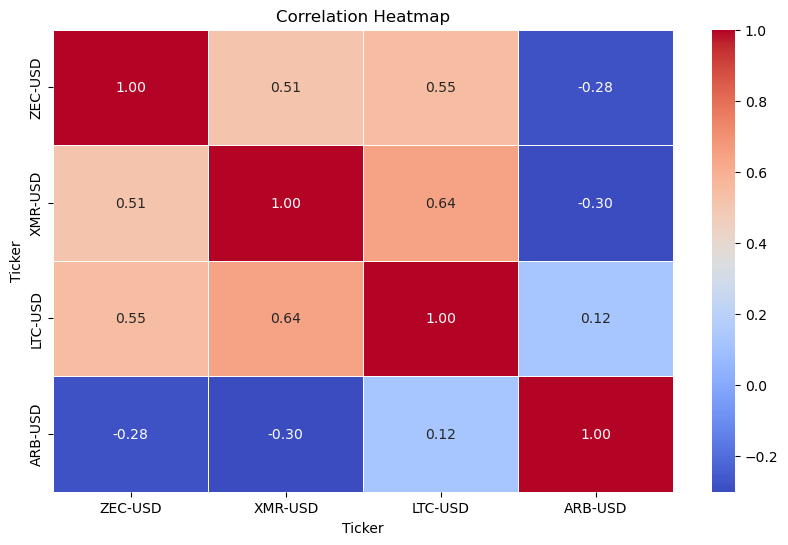

In [29]:
corr_matrix = selected_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

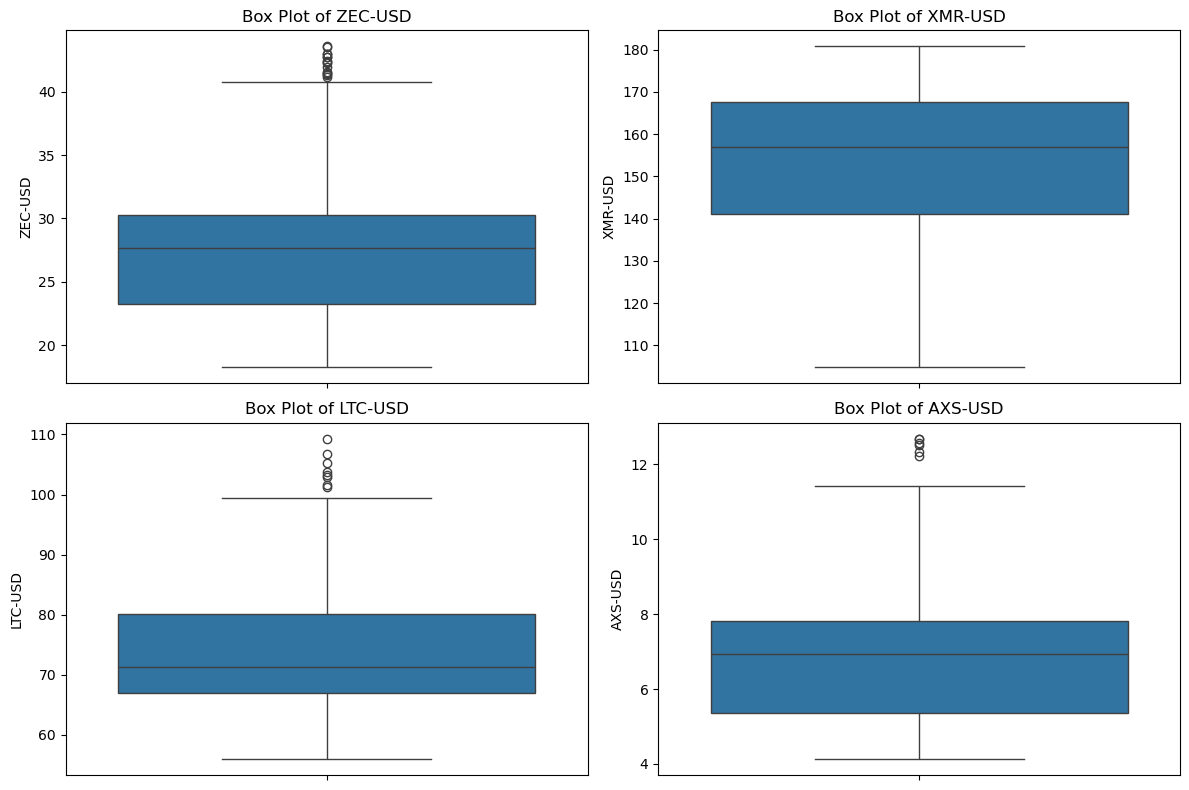

In [56]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot a boxplot for each cryptocurrency
for i, crypto in enumerate(selected):
    sns.boxplot(data=selected_df[crypto], ax=axes[i])
    axes[i].set_title(f"Box Plot of {crypto}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

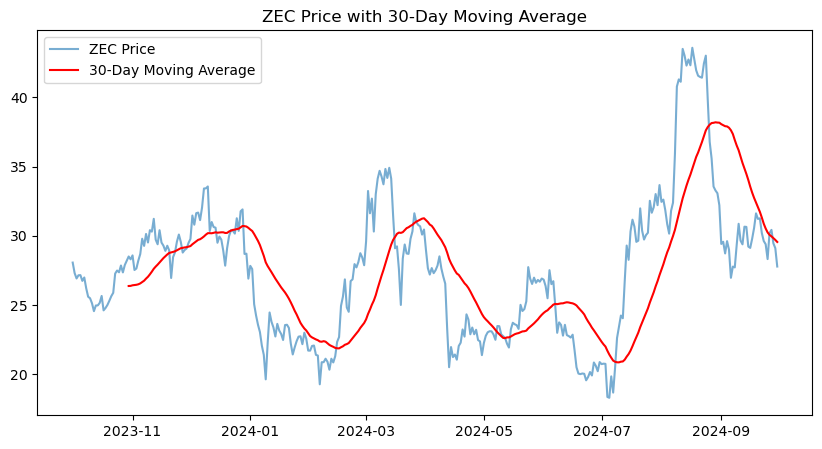

In [58]:
selected_df['ZEC-USD_MA30'] = selected_df['ZEC-USD'].rolling(window=30).mean()

plt.figure(figsize=(10, 5))
plt.plot(selected_df['ZEC-USD'], label="ZEC Price", alpha=0.6)
plt.plot(selected_df['ZEC-USD_MA30'], label="30-Day Moving Average", color='red')
plt.legend()
plt.title("ZEC Price with 30-Day Moving Average")
plt.show()